In [1]:
pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

import pandas as pd 

import tensorflow as tf

from tensorflow import keras

import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style= "darkgrid", color_codes = True)

from tensorflow.keras.preprocessing.image import  load_img

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from sklearn.metrics import roc_curve, auc

from tensorflow.keras.applications import VGG16

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

from keras.regularizers import l2

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings

from tensorflow.keras import layers

warnings.filterwarnings('ignore')

### Libraries Imported:

#### NumPy: 
Library for numerical operations and array manipulations.

#### TensorFlow and Keras: 
TensorFlow is an open-source deep learning framework, and Keras is an API used for building and training neural networks on top of TensorFlow.

#### Matplotlib: 
A plotting library for generating visualizations and graphs.

#### Seaborn: 
A data visualization library based on Matplotlib, used to enhance the aesthetics of visualizations.

### Configuration and Setup:

#### sns.set(style= "darkgrid", color_codes = True): 
Configures the default aesthetic style and color codes for Seaborn.

### Neural Network Components Imported:

#### VGG16: 
Pre-trained deep convolutional neural network model for image recognition.

#### Sequential, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input: 
Various components and layers used for building neural networks.

#### l2: 
Regularization technique to reduce overfitting in neural networks.

#### Precision, Recall, BinaryAccuracy: 
Metrics used for evaluating model performance.

#### roc_curve, auc: 
Functions from scikit-learn for computing Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) metrics.

#### Adam: 
An optimization algorithm often used for training deep learning models.

#### ImageDataGenerator: 
Tool for data augmentation and preprocessing for training deep learning models on images.

### Suppressing Warnings:

#### warnings.filterwarnings('ignore'): 
Suppresses warning messages to clean up the output.

In [3]:
img_width, img_height = 224, 224
batchsize = 32
epochs = 10
num_of_class = 2

train = keras. utils.image_dataset_from_directory(
    directory='/Users/deva/Desktop/DEVA/CSUN/Sem_3/Research/chest_xray/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

validation = keras. utils.image_dataset_from_directory(
    directory='/Users/deva/Desktop/DEVA/CSUN/Sem_3/Research/chest_xray/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test = keras. utils.image_dataset_from_directory(
    directory='/Users/deva/Desktop/DEVA/CSUN/Sem_3/Research/chest_xray/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


#### This code sets up image datasets for training, validation, and testing using the Keras utility function. `image_dataset_from_directory`. 

### 1. **Image Dimensions and Batch Size**:

   `img_width, img_height = 224, 224:`
   
              Sets the width and height dimensions for the images. In this case, images are expected to be 224x224 pixels.
              
   `batchsize = 32`:
   
              Defines the batch size, which is the number of images to process at once during training.

### 2. **Number of Classes**:

   `num_of_class = 2`: 
   
          Specifies the number of classes or categories in the classification task. 
          In this case, it's set to 2, indicating a binary classification problem.

### 3. **Data Loading for Training, Validation, and Testing**:

   Three sets of image data are loaded, one each for training, validation, and testing.
   
   The `image_dataset_from_directory` function is used to load data directly from directories containing image files. This function is part of Keras's data preprocessing utilities.

### 4. **Training Data**:

   `train`: 
   Loads the training data. The key parameters are:
   
   `directory`: 
   Specifies the directory path where the training images are located.
     
   `labels='inferred'`: 
   Automatically infers the labels for the images based on the directory structure. 
   
   It assumes that each subdirectory in the training directory corresponds to a class, and the image files within those subdirectories belong to that class.
   
   `label_mode='categorical'`: 
   Indicates that the labels are in categorical format (e.g., one-hot encoded).
   
   `batch_size`: 
   Sets the batch size to 32.
   
   `image_size`: 
   Specifies the size to which images are resized, which is 224x224 pixels in this case.

### 5. **Validation Data**:

   `validation`: 
    Loads the validation data in a similar manner to the training data.

### 6. **Testing Data**:

   `test`: Loads the testing data.

Overall, this code sets up data pipelines for training, validation, and testing by directly reading image files from directories. 

It infers labels, specifies the image size, and sets the batch size for each dataset. 

This is a setup for training and evaluating deep learning models on image classification tasks.

In [4]:
train_dir = '/Users/deva/Desktop/DEVA/CSUN/Sem_3/Research/chest_xray/train'
val_dir = '/Users/deva/Desktop/DEVA/CSUN/Sem_3/Research/chest_xray/val'
test_dir = '/Users/deva/Desktop/DEVA/CSUN/Sem_3/Research/chest_xray/test'


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode = 'grayscale',
    image_size=(img_height, img_width),
    batch_size=batchsize
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    color_mode = 'grayscale',
    image_size=(img_height, img_width),
    batch_size=batchsize
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    color_mode = 'grayscale',
    image_size=(img_height, img_width),
    batch_size=batchsize
)


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [5]:
train_ds.class_names

['NORMAL', 'PNEUMONIA']

In [6]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

2024-04-03 20:58:49.227357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


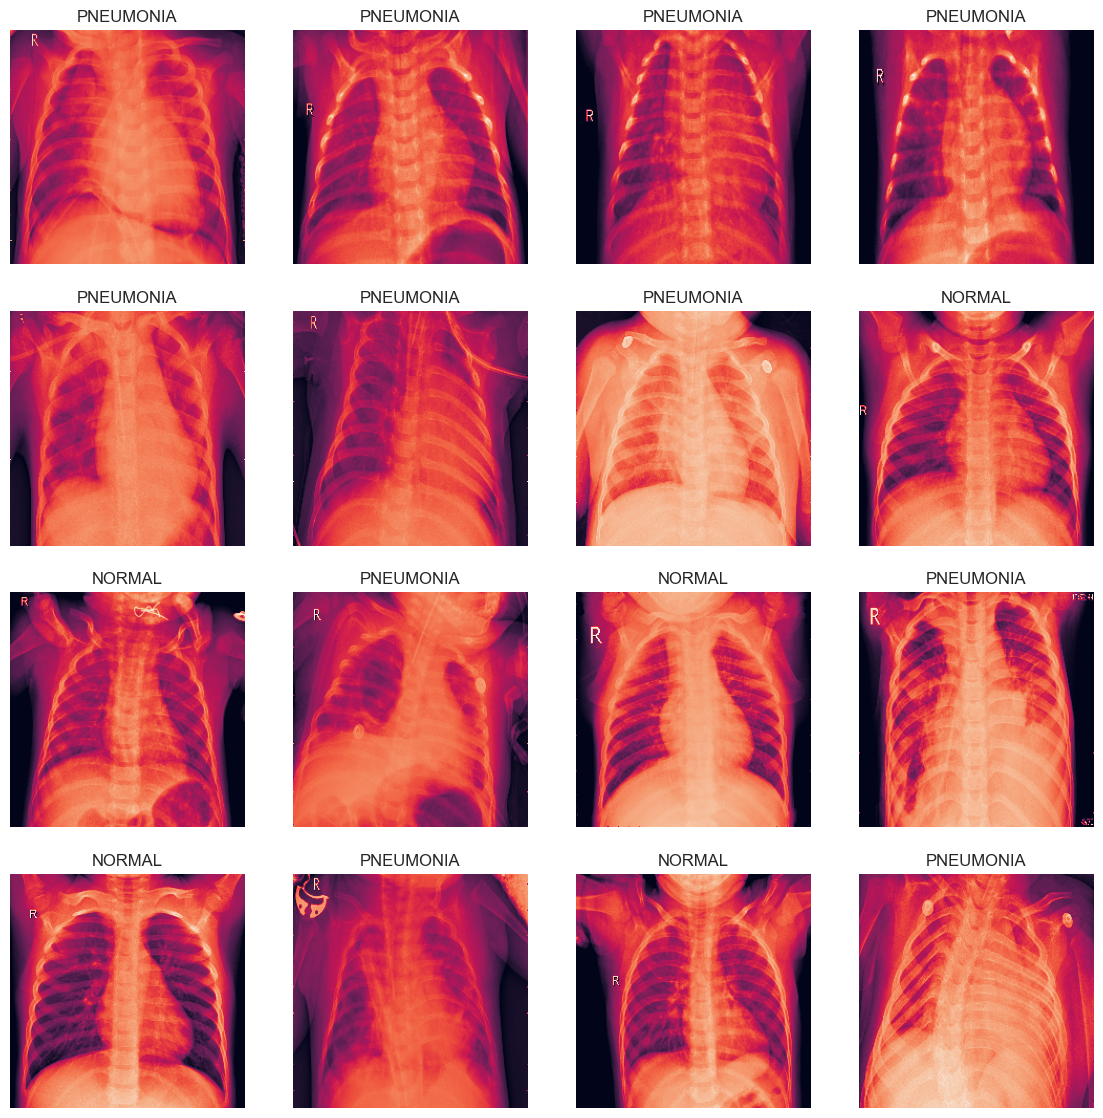

In [7]:
plt.figure(figsize=(14, 14))

for images, labels in train_ds.take(1):
    for i in range(16):
        plt.subplot(4, 4, i +1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [8]:
# Extracting Features and Labels

x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())
    
for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)

2024-04-03 20:58:56.888217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 20:58:57.682723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 20:58:57.711641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


This code extracts the features (input data) and labels (output data) from the previously loaded image datasets for training, validation, and testing. 

It then concatenates these features and labels into arrays. 

### Initialization:

Several empty lists are initialized to store the features and labels separately for training, validation, and testing sets: x_train, y_train, x_val, y_val, x_test, and y_test.

### For Loops:

Three separate FOR loops are used to iterate through the train, test, and validation datasets loaded using image_dataset_from_directory. 

The datasets train, test, and validation are iterable, and in each iteration, they provide a pair of items: feature (image data) and label (corresponding class labels).

### Appending to Lists:

Inside each for loop, the code appends the feature.numpy() to the x_train, x_val, or x_test list, and label.numpy() to the y_train, y_val, or y_test list. 

The .numpy() method is used to extract the NumPy array representation from TensorFlow tensors, which makes it easy to work with standard NumPy arrays.

### Concatenation:

After iterating through all the data in each dataset, the code uses NumPy to concatenate the lists into NumPy arrays for both features and labels. 

Specifically, np.concatenate() is used to stack the data along a specified axis (axis=0), which essentially combines the individual arrays into a single large array.

### At the end of this code, you will have the following arrays:

#### x_train: Contains the features (image data) for the training set.

#### x_val: Contains the features for the validation set.
#### x_test: Contains the features for the testing set.
#### y_train: Contains the labels (class information) for the training set.
#### y_val: Contains the labels for the validation set.
#### y_test: Contains the labels for the testing set.

These arrays are prepared for use in training and evaluating a deep learning model.





In [9]:
# check the shapes of 'x_train' and 'y_train':

print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)

print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)

print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (5216, 224, 224, 3)
Shape of 'y_train': (5216, 2)
Shape of 'x_val': (16, 224, 224, 3)
Shape of 'y_val': (16, 2)
Shape of 'x_test': (624, 224, 224, 3)
Shape of 'y_test': (624, 2)


This code is used to check and print the shapes (dimensions) of the arrays 'x_train', 'y_train', 'x_val', 'y_val', 'x_test', and 'y_test' after the data extraction and concatenation. 

1. **Print Statements**:

   A series of print statements is used to display the shapes of the arrays. 
   
   Each print statement includes the label for the array and the corresponding shape information.


2. **Shape Attribute**:

   The `shape` attribute is used to retrieve the dimensions of a NumPy array. 
   
   `x_train.shape` returns a tuple representing the shape of the 'x_train' array. 
   
   The tuple contains information about the number of rows, columns, and any additional dimensions if the array is multi-dimensional.


3. **Output**:

   Finally, it will display the shapes of the arrays 'x_train', 'y_train', 'x_val', 'y_val', 'x_test', and 'y_test' in the output. 
   
   We can understand the size and structure of the data that will be used for training, validation, and testing the deep learning model.

By checking the shapes, we can ensure that the data is properly loaded and prepared for the subsequent steps in the machine learning or deep learning workflow.

In [10]:
# Pixel Value Scaling for Datasets: Normalizing and Standardizing the Data

x_train=x_train/255

x_val=x_val/255

x_test=x_test/255

It performs pixel value scaling on the image data in the 'x_train', 'x_val', and 'x_test' arrays. 

Pixel value scaling is a common preprocessing step in machine learning, particularly for neural networks and deep learning models. 

1. **Pixel Value Scaling**:
    
   - Pixel value scaling involves adjusting the values of the image pixels to be within a specific range. 

     The scaling is done by dividing the pixel values by 255. 
    
    This operation scales the pixel values to the range [0, 1].

2. **Normalization**:
    
   - Dividing the pixel values by 255 is a form of normalization. 

Normalization is the process of rescaling data to have a mean of 0 and a standard deviation of 1. 

The range [0, 1] is used, which is a common choice for image data.

3. **Why Normalize**:
    
   - Normalizing pixel values helps neural networks converge faster during training. 

It can also make the learning process more stable and can prevent issues related to vanishing or exploding gradients.

4. **Benefits**:
    
   - Normalizing pixel values ensures that all features (pixel values) are on a similar scale, which can improve the model's ability to generalize to new data. 

It also helps in handling data with varying ranges more effectively.

Finally, The 'x_train', 'x_val', and 'x_test' arrays will contain pixel values that are scaled to the range [0, 1], making them suitable for training and evaluation by deep learning models.

In [11]:
pip install --upgrade certifi



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
        layer.trainable = False
        
# pretrained_model.summary()
last_layer = base_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output)
last_output= last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(2, activation='softmax')(x)           

model = Model(base_model.input, x) 
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
                         metrics=["accuracy"])
model.summary()    


last layer of vgg : output shape:  <KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_18>


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,407,874 (154.14 MB)

 Trainable params: 25,693,186 (98.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3,  restore_best_weights=True)
his = model.fit(x_train, y_train, epochs= 20,batch_size = 32, validation_data= (x_test, y_test), callbacks=[es])

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 657s 4s/step - accuracy: 0.8950 - loss: 0.7794 - val_accuracy: 0.7804 - val_loss: 0.9915
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 778s 5s/step - accuracy: 0.9748 - loss: 0.0670 - val_accuracy: 0.9006 - val_loss: 0.3088
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 792s 5s/step - accuracy: 0.9816 - loss: 0.0473 - val_accuracy: 0.8077 - val_loss: 0.8521
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 793s 5s/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.8926 - val_loss: 0.4309
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 774s 5s/step - accuracy: 0.9879 - loss: 0.0291 - val_accuracy: 0.7516 - val_loss: 1.4720



These lines import the required parts from the Keras API provided by TensorFlow. The Model class is used to create a model by specifying its input and output, while the layers module provides several layers for building neural networks.


The ImageNet VGG16 model with pre-trained weights. incorporate_top=False indicates that you will add your own layers later and that the last completely linked layers of the VGG16 model (the classification head) are not included. 224, 224, 3 is the input shape, assuming that color images are being used.


The trainable attribute of each layer in the base VGG16 model is set to False by iterating over them all. This implies that these layers' weights won't be changed while they are being trained. When employing pre-trained models, it is customary to retain the information acquired from the initial task (ImageNet) and to adjust the model specifically for that particular task.


The 'block5_pool' layer is the final layer of the VGG16 model that you retrieve. This layer prints its output form, while last_output stores the output tensor.


On top of the VGG16 foundation, you create new layers. To flatten the output tensor from the VGG16 base, use the flatten() function. After adding a dense layer with 1024 units and ReLU activation, a dropout layer is added to stop overfitting. Lastly, if you're dealing with a binary classification situation, add a dense layer with two units and softmax activation.


It uses the Model class to generate a new model (model), with the input being the main VGG16 model's input and the output being a tensor x that represents the additional layers.

The sparse categorical crossentropy loss (fit for integer-encoded labels), accuracy as the measure, and the Adam optimizer are used to create the model.a diagram illustrating the layers, output forms, and trainable parameters of the model architecture.

In [15]:
eval_results = model.evaluate(x_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.9081 - loss: 0.2991
